<a href="https://colab.research.google.com/github/crsanderford/DS-Unit-1-Sprint-1-Dealing-With-Data/blob/master/Connor_Sanderford_DS_Unit_1_Sprint_Challenge_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Data Science Unit 1 Sprint Challenge 1

## Loading, cleaning, visualizing, and analyzing data

In this sprint challenge you will look at a dataset of the survival of patients who underwent surgery for breast cancer.

http://archive.ics.uci.edu/ml/datasets/Haberman%27s+Survival

Data Set Information:
The dataset contains cases from a study that was conducted between 1958 and 1970 at the University of Chicago's Billings Hospital on the survival of patients who had undergone surgery for breast cancer.

Attribute Information:
1. Age of patient at time of operation (numerical)
2. Patient's year of operation (year - 1900, numerical)
3. Number of positive axillary nodes detected (numerical)
4. Survival status (class attribute)
-- 1 = the patient survived 5 years or longer
-- 2 = the patient died within 5 year

Sprint challenges are evaluated based on satisfactory completion of each part. It is suggested you work through it in order, getting each aspect reasonably working, before trying to deeply explore, iterate, or refine any given step. Once you get to the end, if you want to go back and improve things, go for it!

## Part 1 - Load and validate the data

- Load the data as a `pandas` data frame.
- Validate that it has the appropriate number of observations (you can check the raw file, and also read the dataset description from UCI).
- Validate that you have no missing values.
- Add informative names to the features.
- The survival variable is encoded as 1 for surviving >5 years and 2 for not - change this to be 0 for not surviving and 1 for surviving >5 years (0/1 is a more traditional encoding of binary variables)

At the end, print the first five rows of the dataset to demonstrate the above.

In [1]:
# Imports
# roll back pandas so I can crosstab two bins

!pip install pandas==0.23.4
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Code block for examining files
!curl http://archive.ics.uci.edu/ml/machine-learning-databases/haberman/haberman.names

1. Title: Haberman's Survival Data

2. Sources:
   (a) Donor:   Tjen-Sien Lim (limt@stat.wisc.edu)
   (b) Date:    March 4, 1999

3. Past Usage:
   1. Haberman, S. J. (1976). Generalized Residuals for Log-Linear
      Models, Proceedings of the 9th International Biometrics
      Conference, Boston, pp. 104-122.
   2. Landwehr, J. M., Pregibon, D., and Shoemaker, A. C. (1984),
      Graphical Models for Assessing Logistic Regression Models (with
      discussion), Journal of the American Statistical Association 79:
      61-83.
   3. Lo, W.-D. (1993). Logistic Regression Trees, PhD thesis,
      Department of Statistics, University of Wisconsin, Madison, WI.

4. Relevant Information:
   The dataset contains cases from a study that was conducted between
   1958 and 1970 at the University of Chicago's Billings Hospital on
   the survival of patients who had undergone surgery for breast
   cancer.

5. Number of Instances: 306

6. Number of Attributes: 4 (including the class attribute)

7. 

In [0]:
# Read in the data, name the features properly
url = 'http://archive.ics.uci.edu/ml/machine-learning-databases/haberman/haberman.data'
columns = ['Age','Year of Operation','Positive Nodes','Survival']
df = pd.read_csv(url, header=None, names=columns)

In [4]:
# Check the shape
print(df.shape)

# And check for nulls
df.isna().sum()

(306, 4)


Age                  0
Year of Operation    0
Positive Nodes       0
Survival             0
dtype: int64

In [0]:
# That's consistent with what we see in the .names file. No nulls either.

# Moving on to re-encoding the survival variable.

df['Survival'] = np.where( df['Survival'] == 2, 0, 1
                          )

In [6]:
# Printing ten because five doesn't show zeros in survival
df.head(10)

,Age,Year of Operation,Positive Nodes,Survival
0,30,64,1,1
1,30,62,3,1
2,30,65,0,1
3,31,59,2,1
4,31,65,4,1
5,33,58,10,1
6,33,60,0,1
7,34,59,0,0
8,34,66,9,0
9,34,58,30,1


## Part 2 - Examine the distribution and relationships of the features

Explore the data - create at least *2* tables (can be summary statistics or crosstabulations) and *2* plots illustrating the nature of the data.

This is open-ended, so to remind - first *complete* this task as a baseline, then go on to the remaining sections, and *then* as time allows revisit and explore further.

Hint - you may need to bin some variables depending on your chosen tables/plots.

In [7]:
# summary stats
df.describe()

,Age,Year of Operation,Positive Nodes,Survival
count,306.000000,306.000000,306.000000,306.000000
mean,52.457516,62.852941,4.026144,0.735294
std,10.803452,3.249405,7.189654,0.441899
min,30.000000,58.000000,0.000000,0.000000
25%,44.000000,60.000000,0.000000,0.000000
50%,52.000000,63.000000,1.000000,1.000000
75%,60.750000,65.750000,4.000000,1.000000
max,83.000000,69.000000,52.000000,1.000000


In [54]:
# Pearson correlation coefficients of all features
df.corr()

,Age,Year of Operation,Positive Nodes,Survival
Age,1.000000,0.089529,-0.063176,-0.067950
Year of Operation,0.089529,1.000000,-0.003764,0.004768
Positive Nodes,-0.063176,-0.003764,1.000000,-0.286768
Survival,-0.067950,0.004768,-0.286768,1.000000


Text(0.5, 0, 'Age')

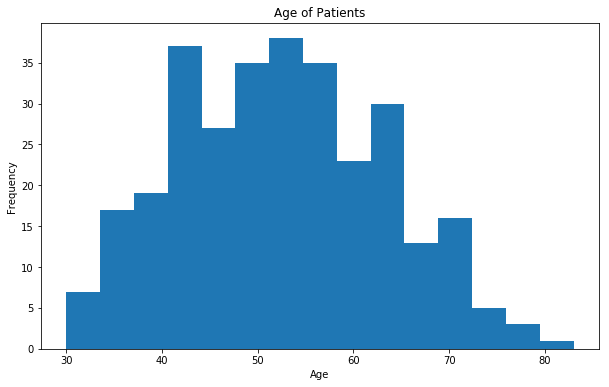

In [68]:
# Histogram of patient age

densityfig = plt.figure(figsize = [10,6])
plt.hist(df['Age'], bins=15)
plt.title('Age of Patients');
plt.ylabel('Frequency')
plt.xlabel('Age')


In [0]:
# Bins for age and nodes
age_bins = pd.cut(df['Age'], 10)
node_bins = pd.cut(df['Positive Nodes'], 10)

In [63]:
# Crosstab nodes and survival

node_surv_ct = pd.crosstab(index=node_bins, columns=df['Survival'], normalize='index')
node_surv_ct

Survival,0,1
Positive Nodes,,
"(-0.052, 5.2]",0.194915,0.805085
"(5.2, 10.4]",0.400000,0.600000
"(10.4, 15.6]",0.611111,0.388889
"(15.6, 20.8]",0.500000,0.500000
"(20.8, 26.0]",0.666667,0.333333
"(26.0, 31.2]",0.000000,1.000000
"(31.2, 36.4]",1.000000,0.000000
"(41.6, 46.8]",0.000000,1.000000
"(46.8, 52.0]",1.000000,0.000000


Text(0.5, 0, 'Positive Nodes')

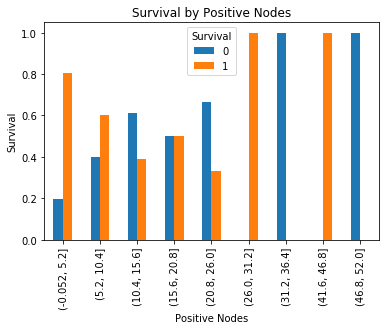

In [70]:
# Bar chart of survival vs positve nodes

node_surv_ct.plot.bar()
plt.title('Survival by Positive Nodes');
plt.ylabel('Survival')
plt.xlabel('Positive Nodes')

In [66]:
# Crosstab operation year and survival

year_surv_ct = pd.crosstab(index=df['Year of Operation'], columns=df['Survival'], normalize='index')
year_surv_ct

Survival,0,1
Year of Operation,,
58,0.333333,0.666667
59,0.333333,0.666667
60,0.142857,0.857143
61,0.115385,0.884615
62,0.304348,0.695652
63,0.266667,0.733333
64,0.258065,0.741935
65,0.464286,0.535714
66,0.214286,0.785714


Text(0.5, 0, 'Year of Operation')

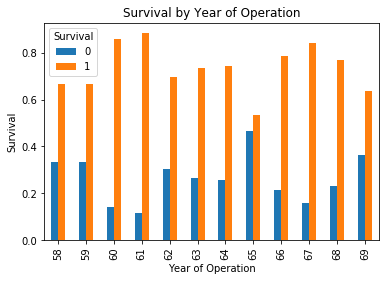

In [69]:
#  Bar chart of survival by year of operation

year_surv_ct.plot.bar()
plt.title('Survival by Year of Operation');
plt.ylabel('Survival')
plt.xlabel('Year of Operation')

Text(0.5, 0, 'Year of operation')

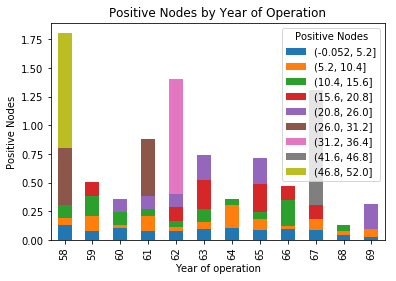

In [60]:
# Crosstab year and nodes, stacked bar plot of positive nodes by year

year_node_ct = pd.crosstab(index=df['Year of Operation'], columns=node_bins, normalize='columns')
year_node_ct.plot.bar(stacked=True)
plt.title('Positive Nodes by Year of Operation');
plt.ylabel('Positive Nodes')
plt.xlabel('Year of operation')

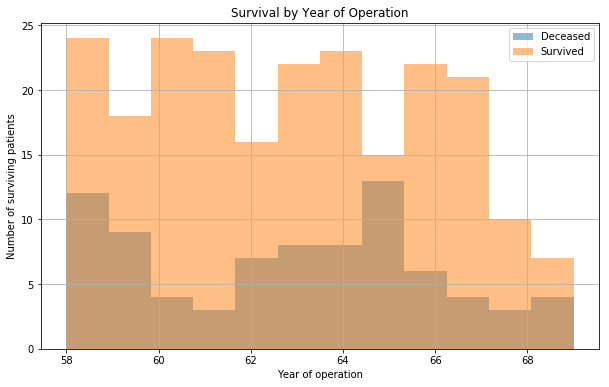

In [58]:
# Overlapping histograms of survival by year

survivalbyyear = plt.figure(figsize = [10,6])
df.groupby('Survival')['Year of Operation'].hist(bins=12, alpha=0.5)
plt.title('Survival by Year of Operation');
plt.ylabel('Number of surviving patients')
plt.xlabel('Year of operation')
plt.legend(['Deceased','Survived']);

## Part 3 - Analysis and Interpretation

Now that you've looked at the data, answer the following questions:

- What is at least one feature that looks to have a positive relationship with survival?
- What is at least one feature that looks to have a negative relationship with survival?
- How are those two features related with each other, and what might that mean?

Answer with text, but feel free to intersperse example code/results or refer to it from earlier.



1.   The year in which the operation occured appears to have a positive relationship with survival - that being said, it's very weak, with a Pearson coefficient of 0.005.




In [51]:
df['Year of Operation'].corr(df['Survival'])

0.0047681801711656315

2.   The number of positive axillary nodes appears to have a negative relationship with survival, with a Pearson coefficient of -0.29. Number of nodes might suggest severity, or state of progression of the disease.

In [52]:
df['Positive Nodes'].corr(df['Survival'])

-0.2867675671184199

3.  The year of operation and number of positive axillary nodes have a *very* slight negative correlation, with a Pearson coefficient of -0.004, as shown below. This would suggest that they have no direct relationship of any significance.


In [44]:
df['Year of Operation'].corr(df['Positive Nodes'])

-0.0037644741718606185